# ---------------------------CROP RECOMMENDER SYSTEM---------------------------------------

# Import important libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Load Data

In [2]:
crop_ds=pd.read_csv('Crop_recommendation.csv')

# Preprocessing and Analysis

In [3]:
crop_ds.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


N - ratio of Nitrogen content in soil - kg/ha

P - ratio of Phosphorous content in soil - kg/ha

K - ratio of Potassium content in soil - kg/ha

temperature - temperature in degree Celsius

humidity - relative humidity in %

ph - ph value of the soil

rainfall - rainfall in mm

In [4]:
crop_ds.shape

(2200, 8)

In [5]:
crop_ds.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [6]:
crop_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [7]:
crop_ds.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [8]:
crop_ds.isnull().any()

N              False
P              False
K              False
temperature    False
humidity       False
ph             False
rainfall       False
label          False
dtype: bool

In [9]:
crop_ds.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


Plot Histogram of Gredients

array([[<AxesSubplot:title={'center':'N'}>,
        <AxesSubplot:title={'center':'P'}>,
        <AxesSubplot:title={'center':'K'}>],
       [<AxesSubplot:title={'center':'temperature'}>,
        <AxesSubplot:title={'center':'humidity'}>,
        <AxesSubplot:title={'center':'ph'}>],
       [<AxesSubplot:title={'center':'rainfall'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

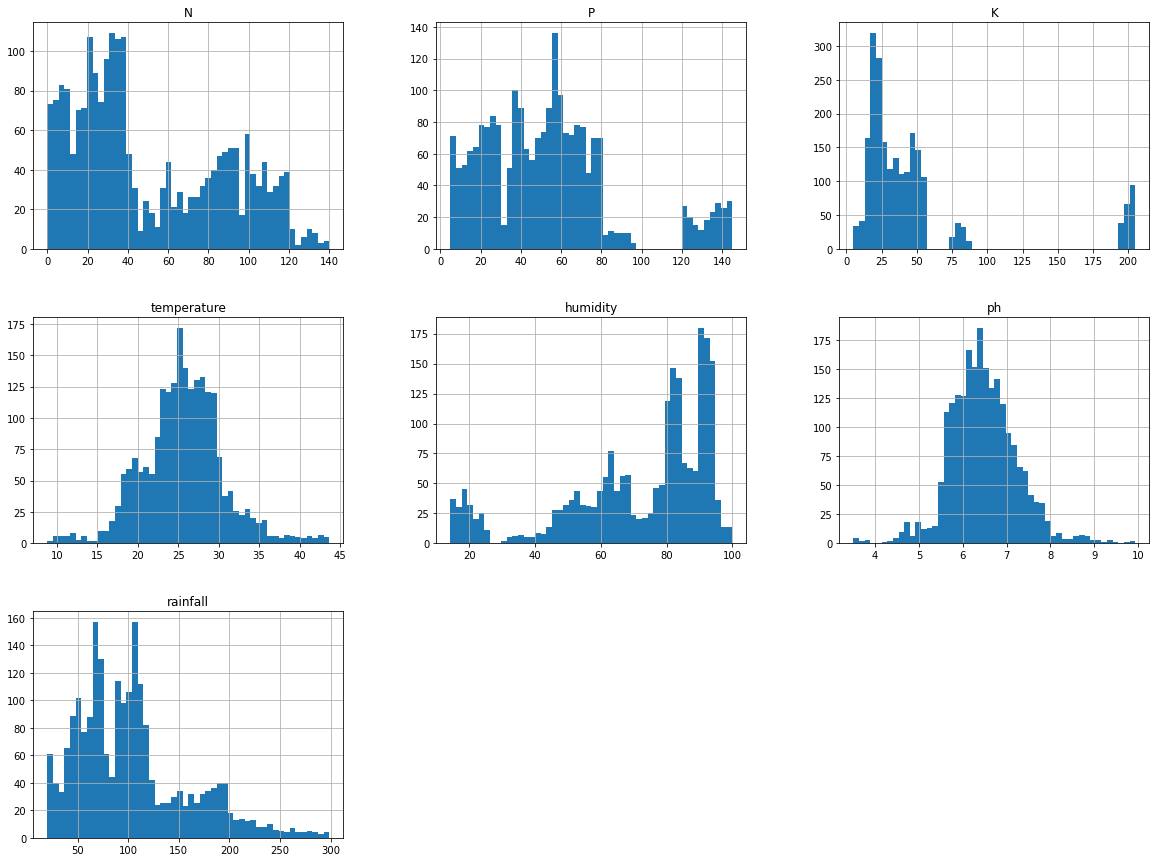

In [10]:
crop_ds.hist(bins=50, figsize=(20, 15))

<AxesSubplot:>

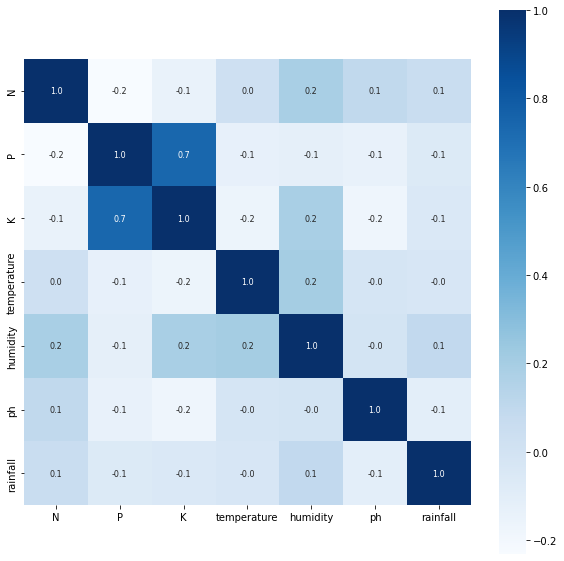

In [11]:
correlation = crop_ds.corr()
plt.figure(figsize=(10,10))
sns.heatmap(data=correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [12]:
crop_ds['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

<AxesSubplot:xlabel='label', ylabel='count'>

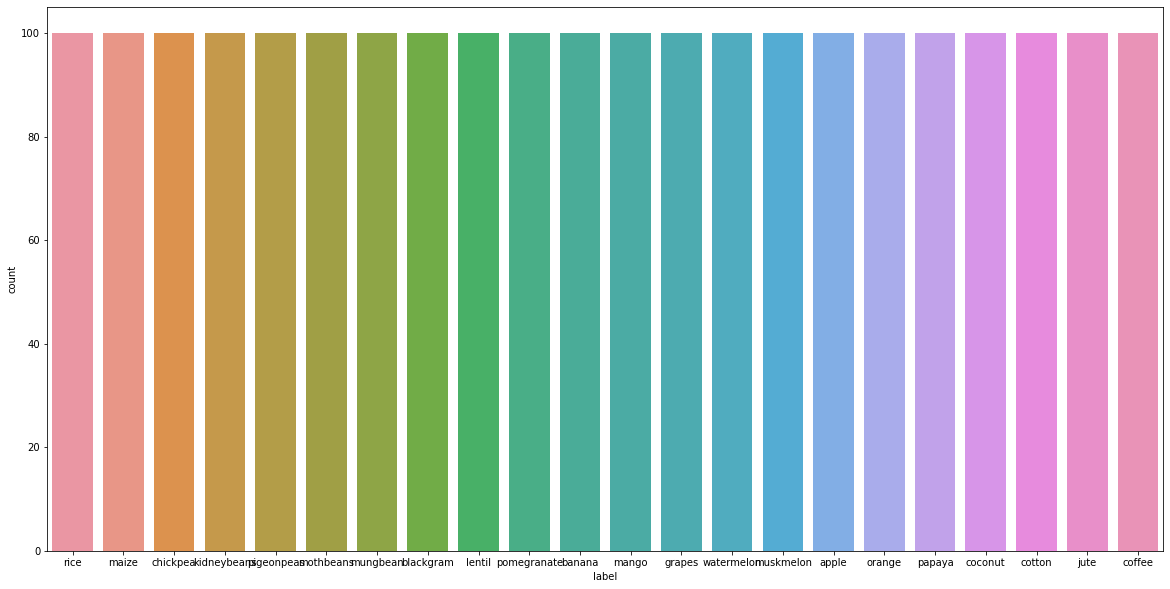

In [13]:
plt.figure(figsize=(20,10))
sns.countplot(x='label',data=crop_ds) 

KeyError: "None of [Index(['label'], dtype='object')] are in the [columns]"

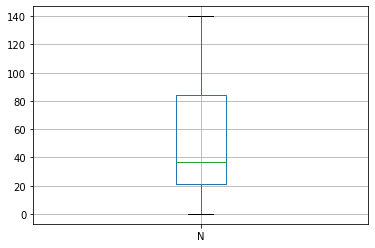

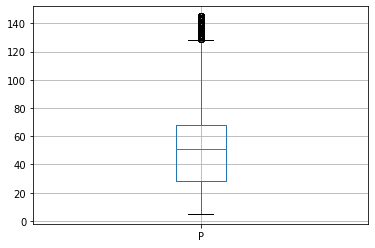

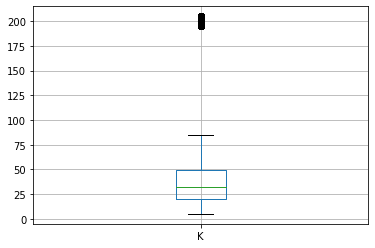

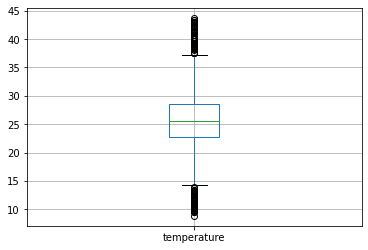

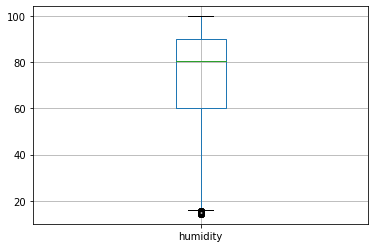

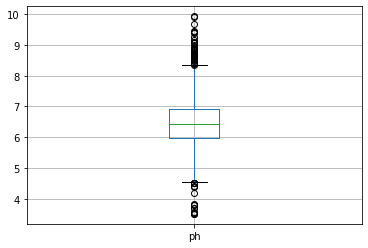

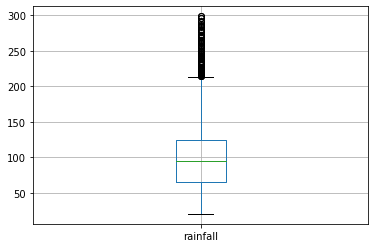

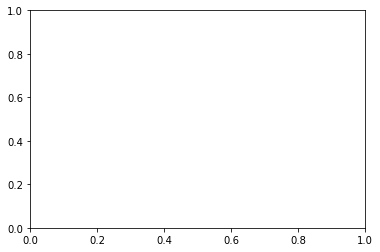

In [14]:
# Box plot for visualizig the outliers in the dataset
for column in crop_ds:
    plt.figure()
    crop_ds.boxplot([column])

In [15]:
columns = crop_ds.columns[:-1]

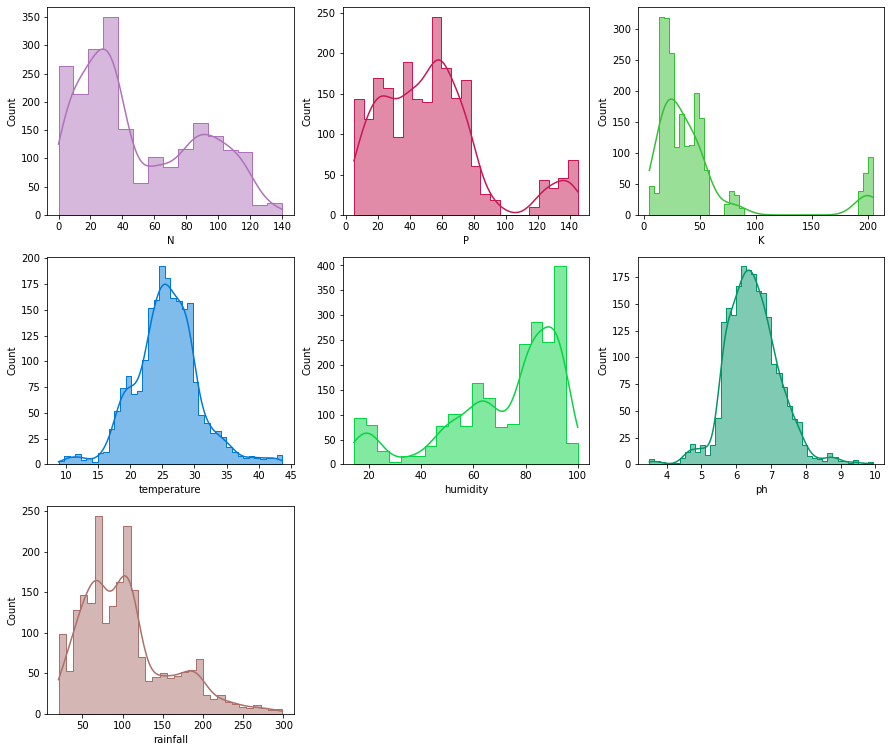

In [16]:
#Distribution
plt.figure(figsize=(15,13))
i = 1
for column in columns:
    plt.subplot(3,3,i)
    rgb = np.random.rand(3,)
    sns.histplot(crop_ds[column], kde = True, color = rgb, element = 'step')
    i+=1
plt.show()

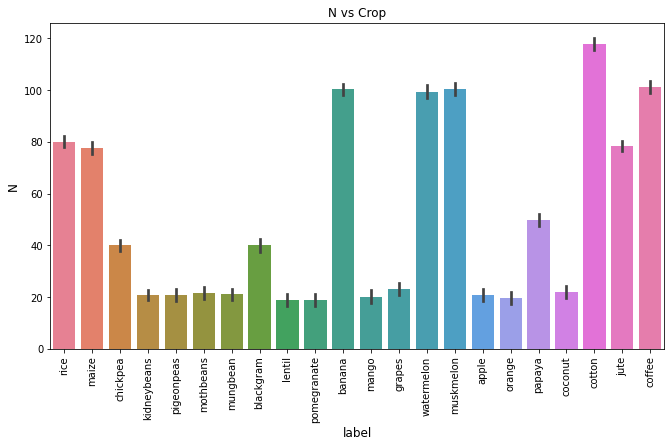

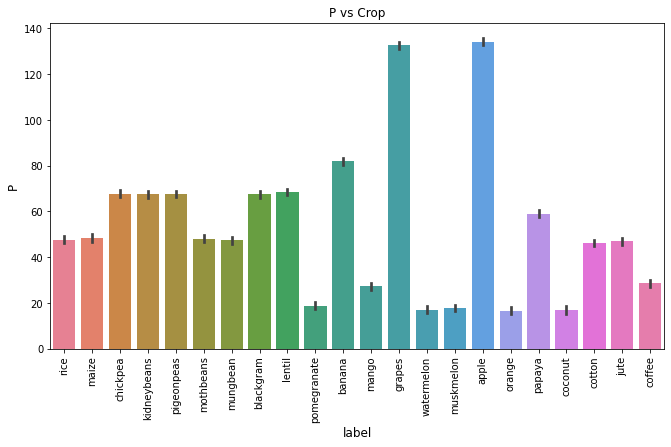

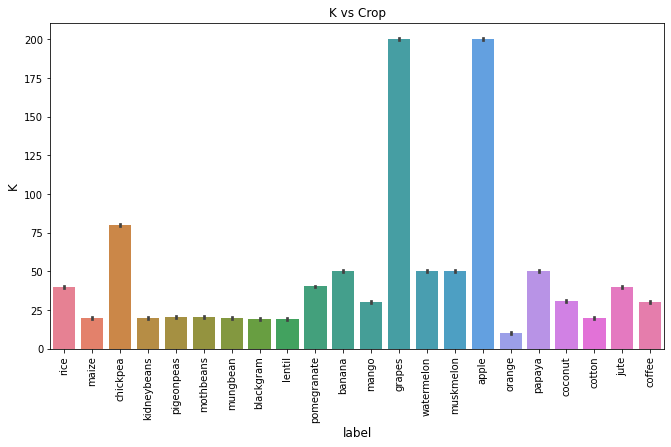

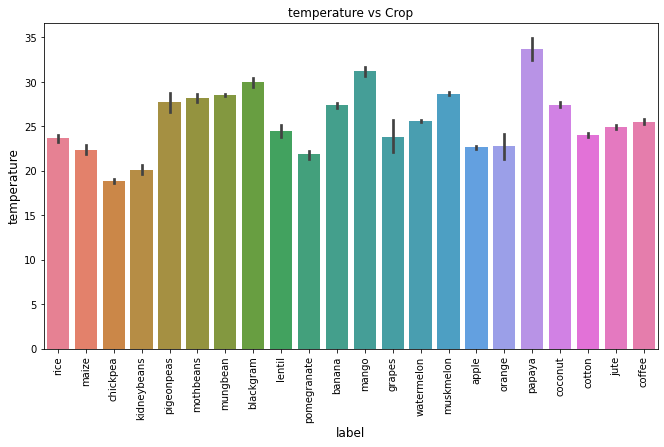

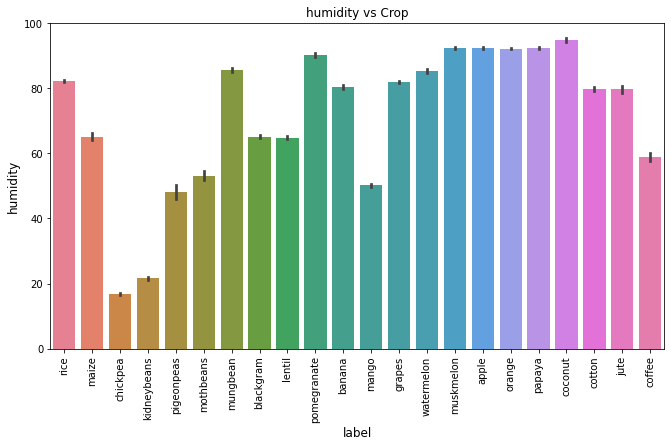

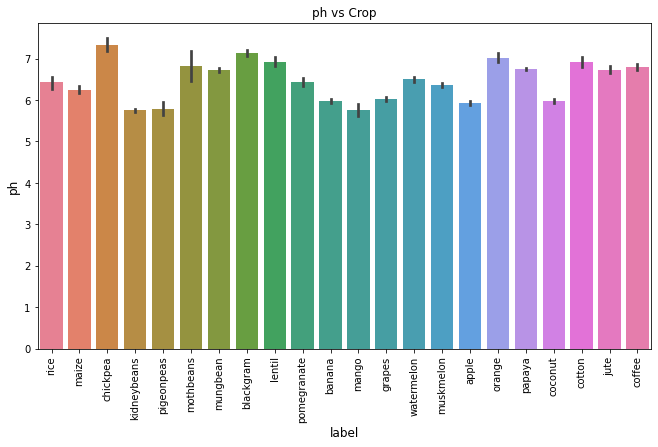

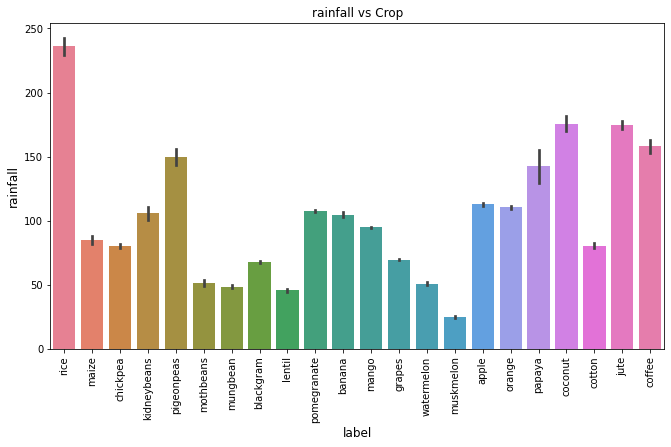

In [17]:
for column in columns:
    plt.figure(figsize = (11, 6))
    sns.barplot(x = 'label', y = column, data = crop_ds, palette = 'husl')
    plt.xlabel('label', fontsize = 12)
    plt.ylabel(column, fontsize = 12)
    plt.xticks(rotation=90)
    plt.title(f'{column} vs Crop')
    plt.show()

<Figure size 1440x720 with 0 Axes>

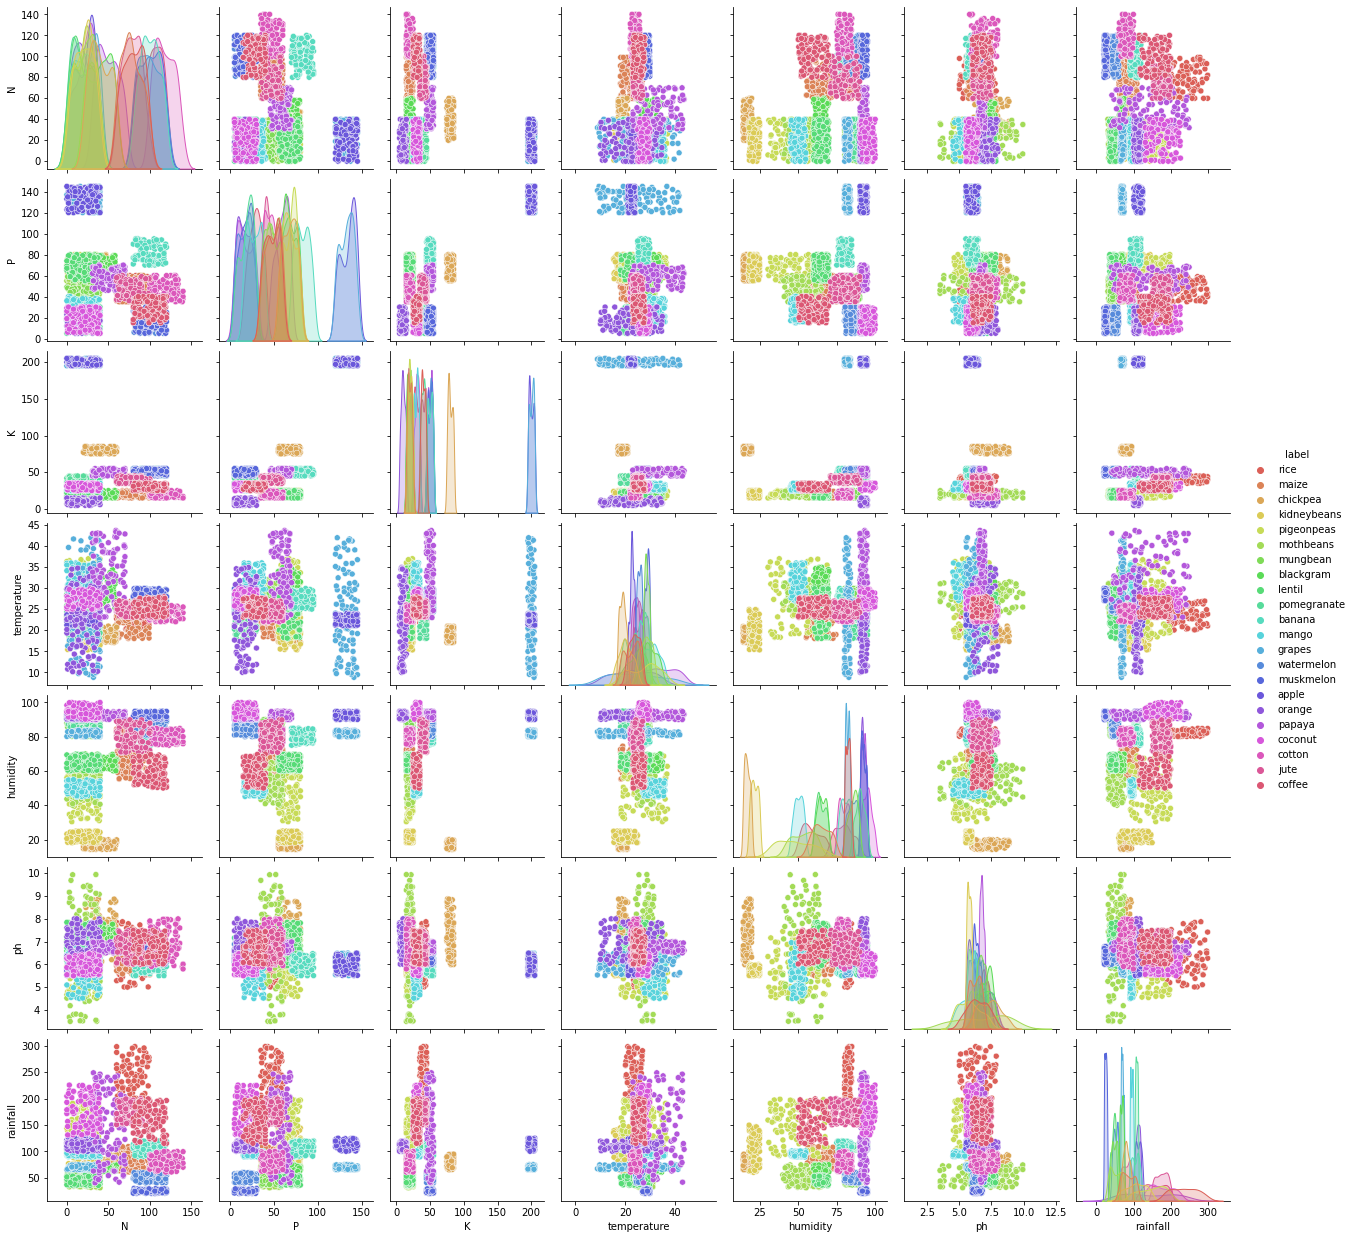

In [18]:
plt.figure(figsize = (20, 10))
sns.pairplot(crop_ds, hue = 'label', palette = 'hls')
plt.show()

# ----------------Data Spliting-----------------

In [19]:
X=crop_ds.drop('label', axis=1)
Y=crop_ds['label']

In [20]:
X.shape, Y.shape

((2200, 7), (2200,))

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

# -------------Model Selection & Evaluation-----------------

# ------------RandomForestClassifier-------------

In [22]:
from sklearn.ensemble import RandomForestClassifier
RandomForestClassifier=RandomForestClassifier()
RandomForestClassifier.fit(X_train, Y_train)

RandomForestClassifier()

In [ ]:
#On training data set accuracy

In [23]:
#On training data set accuracy
RF_train_pred=RandomForestClassifier.predict(X_train)
accuracy_train = metrics.accuracy_score(Y_train,RF_train_pred)
print('accuracy_train:',accuracy_train)

accuracy_train: 1.0


In [24]:
#On testing data set accuracy
RF_test_pred=RandomForestClassifier.predict(X_test)
accuracy_test = metrics.accuracy_score(Y_test,RF_test_pred)
print('accuracy_test:',accuracy_test)

accuracy_test: 0.9931818181818182


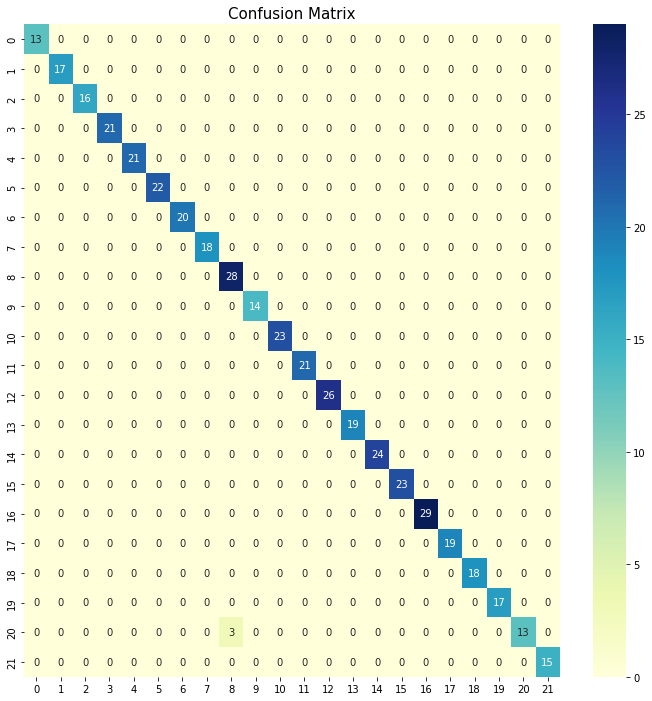

In [25]:
#Confusion matrix
plt.figure(figsize=(12,12))
cm = metrics.confusion_matrix(Y_test,RF_test_pred)
sns.heatmap(cm, annot = True, cmap = 'YlGnBu')
plt.title('Confusion Matrix', fontsize=15)
plt.show()

In [26]:
report = metrics.classification_report(Y_test,RF_test_pred)

print(report)


              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.90      1.00      0.95        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      1.00      1.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        29
      papaya       1.00    

# ------------SVM-------------

In [27]:
from sklearn.svm import SVC
SVM=SVC()
SVM.fit(X_train,Y_train)

SVC()

In [28]:
#On training data set accuracy
SVM_train_pred=SVM.predict(X_train)
accuracy_train = metrics.accuracy_score(Y_train,SVM_train_pred)
print('accuracy_train:',accuracy_train)

accuracy_train: 0.9801136363636364


In [29]:
#On testing data set accuracy
SVM_test_pred=SVM.predict(X_test)
accuracy_test = metrics.accuracy_score(Y_test,SVM_test_pred)
print('accuracy_test:',accuracy_test)

accuracy_test: 0.9772727272727273


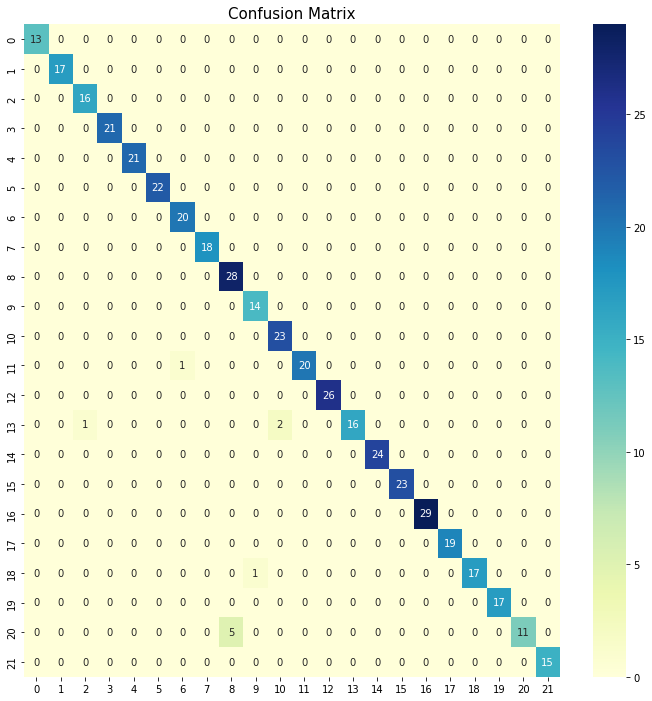

In [30]:
#Confusion matrix
plt.figure(figsize=(12,12))
cm = metrics.confusion_matrix(Y_test,SVM_test_pred)
sns.heatmap(cm, annot = True, cmap = 'YlGnBu')
plt.title('Confusion Matrix', fontsize=15)
plt.show()

In [31]:
report = metrics.classification_report(Y_test,SVM_test_pred)

print(report)

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.94      1.00      0.97        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       0.95      1.00      0.98        20
      grapes       1.00      1.00      1.00        18
        jute       0.85      1.00      0.92        28
 kidneybeans       0.93      1.00      0.97        14
      lentil       0.92      1.00      0.96        23
       maize       1.00      0.95      0.98        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      0.84      0.91        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        29
      papaya       1.00    

# ---------Naive Bayes(Gaussian)-----------------

In [32]:
from sklearn.naive_bayes import GaussianNB
GaussianNB=GaussianNB()
GaussianNB.fit(X_train,Y_train)

GaussianNB()

In [33]:
#On training data set accuracy
GaussianNB_train_pred=GaussianNB.predict(X_train)
accuracy_train = metrics.accuracy_score(Y_train,GaussianNB_train_pred)
print('accuracy_train:',accuracy_train)

accuracy_train: 0.9960227272727272


In [34]:
#On testing data set accuracy
GaussianNB_test_pred=GaussianNB.predict(X_test)
accuracy_test = metrics.accuracy_score(Y_test,GaussianNB_test_pred)
print('accuracy_test:',accuracy_test)

accuracy_test: 0.990909090909091


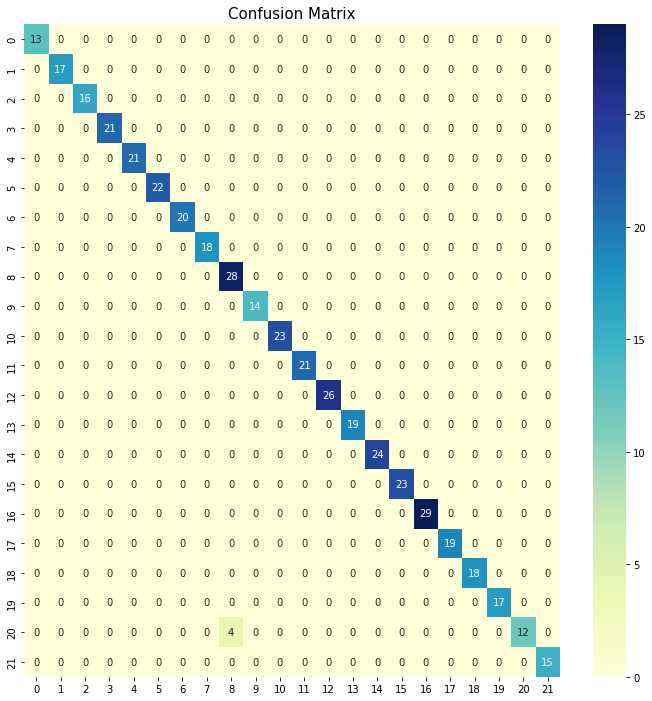

In [35]:
#Confusion matrix
plt.figure(figsize=(12,12))
cm = metrics.confusion_matrix(Y_test,GaussianNB_test_pred)
sns.heatmap(cm, annot = True, cmap = 'YlGnBu')
plt.title('Confusion Matrix', fontsize=15)
plt.show()

# Classification Report Naive Bayes on Crop Recomendation 

In [36]:
report = metrics.classification_report(Y_test,GaussianNB_test_pred)

print(report)

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.88      1.00      0.93        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      1.00      1.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        29
      papaya       1.00    

# ------Stochastic Gradient Descent Classifier--------

In [37]:
from sklearn.linear_model import SGDClassifier
SGDClassifier=SGDClassifier()
SGDClassifier.fit(X_train,Y_train)

SGDClassifier()

In [38]:
#On training data set accuracy
SGDClassifier_train_pred=SGDClassifier.predict(X_train)
accuracy_train = metrics.accuracy_score(Y_train,SGDClassifier_train_pred)
print('accuracy_train:',accuracy_train)

accuracy_train: 0.7772727272727272


In [39]:
#On testing data set accuracy
SGDClassifier_test_pred=SGDClassifier.predict(X_test)
accuracy_test = metrics.accuracy_score(Y_test,SGDClassifier_test_pred)
print('accuracy_test:',accuracy_test)

accuracy_test: 0.8068181818181818


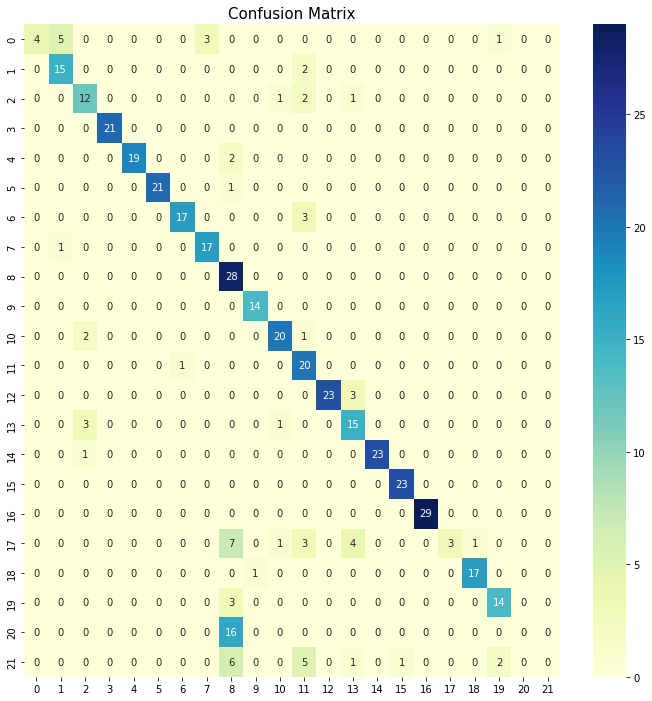

In [40]:
#Confusion matrix
plt.figure(figsize=(12,12))
cm = metrics.confusion_matrix(Y_test,SGDClassifier_test_pred)
sns.heatmap(cm, annot = True, cmap = 'YlGnBu')
plt.title('Confusion Matrix', fontsize=15)
plt.show()

In [41]:
report = metrics.classification_report(Y_test,SGDClassifier_test_pred)

print(report)

              precision    recall  f1-score   support

       apple       1.00      0.31      0.47        13
      banana       0.71      0.88      0.79        17
   blackgram       0.67      0.75      0.71        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      0.90      0.95        21
      coffee       1.00      0.95      0.98        22
      cotton       0.94      0.85      0.89        20
      grapes       0.85      0.94      0.89        18
        jute       0.44      1.00      0.62        28
 kidneybeans       0.93      1.00      0.97        14
      lentil       0.87      0.87      0.87        23
       maize       0.56      0.95      0.70        21
       mango       1.00      0.88      0.94        26
   mothbeans       0.62      0.79      0.70        19
    mungbean       1.00      0.96      0.98        24
   muskmelon       0.96      1.00      0.98        23
      orange       1.00      1.00      1.00        29
      papaya       1.00    

C:\Users\M_ISHFAQ\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\M_ISHFAQ\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\M_ISHFAQ\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# ------------KNN (k-nearest neighbor)-----------

In [42]:
from sklearn.neighbors import KNeighborsClassifier
KNeighborsClassifier=KNeighborsClassifier()
KNeighborsClassifier.fit(X_train,Y_train)

KNeighborsClassifier()

In [43]:
#On training data set accuracy
KNeighborsClassifier_train_pred=KNeighborsClassifier.predict(X_train)
accuracy_train = metrics.accuracy_score(Y_train,KNeighborsClassifier_train_pred)
print('accuracy_train:',accuracy_train)

accuracy_train: 0.9886363636363636


In [44]:
#On testing data set accuracy
KNeighborsClassifier_test_pred=KNeighborsClassifier.predict(X_test)
accuracy_test = metrics.accuracy_score(Y_test,KNeighborsClassifier_test_pred)
print('accuracy_test:',accuracy_test)

accuracy_test: 0.975


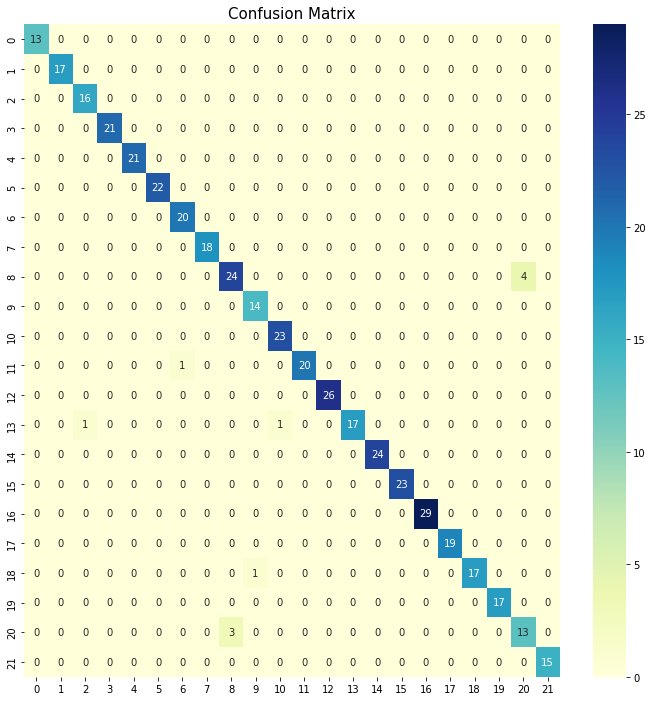

In [45]:
#Confusion matrix
plt.figure(figsize=(12,12))
cm = metrics.confusion_matrix(Y_test,KNeighborsClassifier_test_pred)
sns.heatmap(cm, annot = True, cmap = 'YlGnBu')
plt.title('Confusion Matrix', fontsize=15)
plt.show()

In [46]:
report = metrics.classification_report(Y_test,KNeighborsClassifier_test_pred)

print(report)

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.94      1.00      0.97        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       0.95      1.00      0.98        20
      grapes       1.00      1.00      1.00        18
        jute       0.89      0.86      0.87        28
 kidneybeans       0.93      1.00      0.97        14
      lentil       0.96      1.00      0.98        23
       maize       1.00      0.95      0.98        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      0.89      0.94        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        29
      papaya       1.00    

# ------Decision Tree--------

In [47]:
from sklearn.tree import DecisionTreeClassifier
DecisionTreeClassifier=DecisionTreeClassifier()
DecisionTreeClassifier.fit(X_train,Y_train)

DecisionTreeClassifier()

In [48]:
#On training data set accuracy
DecisionTreeClassifier_train_pred=DecisionTreeClassifier.predict(X_train)
accuracy_train = metrics.accuracy_score(Y_train,DecisionTreeClassifier_train_pred)
print('accuracy_train:',accuracy_train)


accuracy_train: 1.0


In [49]:
#On testing data set accuracy
DecisionTreeClassifier_test_pred=DecisionTreeClassifier.predict(X_test)
accuracy_test = metrics.accuracy_score(Y_test,DecisionTreeClassifier_test_pred)
print('accuracy_test:',accuracy_test)

accuracy_test: 0.975


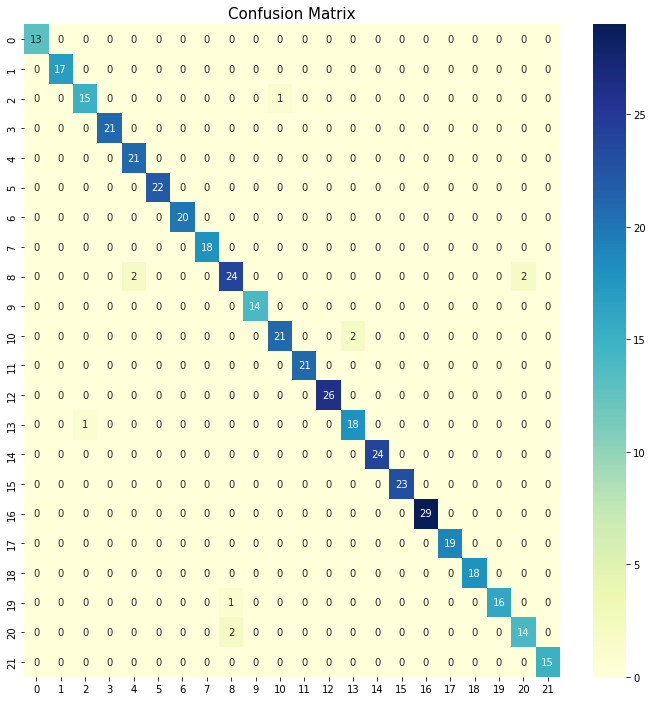

In [51]:
#Confusion matrix
plt.figure(figsize=(12,12))
cm = metrics.confusion_matrix(Y_test,DecisionTreeClassifier_test_pred)
sns.heatmap(cm, annot = True, cmap = 'YlGnBu')
plt.title('Confusion Matrix', fontsize=15)
plt.show()

In [50]:
report = metrics.classification_report(Y_test,DecisionTreeClassifier_test_pred)

print(report)

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.94      0.94      0.94        16
    chickpea       1.00      1.00      1.00        21
     coconut       0.91      1.00      0.95        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.89      0.86      0.87        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       0.95      0.91      0.93        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       0.90      0.95      0.92        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        29
      papaya       1.00    

# ---------------Gradient Boosting Classifier---------------------

In [52]:
from sklearn.ensemble import GradientBoostingClassifier
GradientBoostingClassifier=GradientBoostingClassifier()
GradientBoostingClassifier.fit(X_train,Y_train)

GradientBoostingClassifier()

In [53]:
#On training data set accuracy
GradientBoostingClassifier_train_pred=GradientBoostingClassifier.predict(X_train)
accuracy_train = metrics.accuracy_score(Y_train,GradientBoostingClassifier_train_pred)
print('accuracy_train:',accuracy_train)

accuracy_train: 1.0


In [54]:
#On testing data set accuracy
GradientBoostingClassifier_test_pred=GradientBoostingClassifier.predict(X_test)
accuracy_test = metrics.accuracy_score(Y_test,GradientBoostingClassifier_test_pred)
print('accuracy_test:',accuracy_test)

accuracy_test: 0.9931818181818182


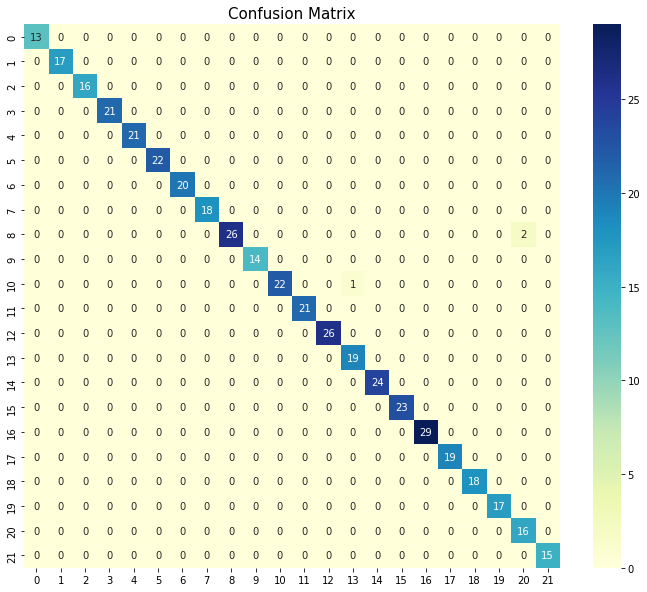

In [55]:
#Confusion matrix
plt.figure(figsize=(12,10))
cm = metrics.confusion_matrix(Y_test,GradientBoostingClassifier_test_pred)
sns.heatmap(cm, annot = True, cmap = 'YlGnBu')
plt.title('Confusion Matrix', fontsize=15)
plt.show()

In [56]:
report = metrics.classification_report(Y_test,GradientBoostingClassifier_test_pred)

print(report)

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       1.00      0.93      0.96        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      0.96      0.98        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       0.95      1.00      0.97        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        29
      papaya       1.00    

# ----------------Making a Predictive Model----------------------

In [57]:
input_data=(30,42,49,20.87974371,42.00274423,6.502985292000001,202.9355362)
#Change the input_data to numpy array
input_data_as_numpy_array=np.asarray(input_data)
#reshape the array as we are predicting for one instance
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
#standardize the input data
#std_data=scaler.transform(input_data_reshaped)
#print(std_data)
a_out=RandomForestClassifier.predict(input_data_reshaped)
print(a_out)

['pigeonpeas']


In [58]:
import pickle
file_name='trained_model.sav'
pickle.dump(RandomForestClassifier, open(file_name, 'wb'))

# ------------------Load Trained Model--------------------

In [59]:
#loading the saved model
loaded_model = pickle.load(open('trained_model.sav','rb'))

In [60]:
input_data=(83,37,49,57.92678579,56.5543196,10.183189922,43.4826194)
#Change the input_data to numpy array
input_data_as_numpy_array=np.asarray(input_data)
#reshape the array as we are predicting for one instance
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
#std_data=scaler.transform(input_data_reshaped)
#print(std_data)
a_out=loaded_model.predict(input_data_reshaped)
print(a_out)

['watermelon']


In [65]:
crop_ds.head(2)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice


In [64]:
df=crop_ds.values

array([[90, 42, 43, ..., 6.502985292000001, 202.9355362, 'rice'],
       [85, 58, 41, ..., 7.038096361, 226.6555374, 'rice'],
       [60, 55, 44, ..., 7.840207144, 263.9642476, 'rice'],
       ...,
       [118, 33, 30, ..., 6.362607851, 173.32283859999995, 'coffee'],
       [117, 32, 34, ..., 6.758792552, 127.1752928, 'coffee'],
       [104, 18, 30, ..., 6.779832611000002, 140.9370415, 'coffee']],
      dtype=object)

# Rice crop requirement Gredients Average, Minimum, Maximum

In [95]:
crops=crop_ds['label'].unique()

In [ ]:
crop=input("Enter the crop Name: )
for i in range(len(crops)):
    if(corps[0][i]==crop):
        print("Pakistan")

In [78]:
#-----------------------------------Nitrogen----------------------------------------
Nitrogen = []

for i in range(len(df)):
    if(df[i][7]=='rice'):
        Nitrogen.append(df[i][0])
        
ave_N_rice=int(sum(Nitrogen)/len(Nitrogen))
Max_N_rice=max(Nitrogen)
Min_N_rice=min(Nitrogen)


print('Average requirement of Nitrogen for Rice Crop:  ',ave_N_rice)
print('Maximum requirement of Nitrogen for Rice Crop:  ', Max_N_rice)
print('Minimum requirement of Nitrogen for Rice Crop:  ',Min_N_rice)

Average requirement of Nitrogen for Rice Crop:   79
Maximum requirement of Nitrogen for Rice Crop:   99
Minimum requirement of Nitrogen for Rice Crop:   60


In [82]:
#-----------------------------------phosphoru----------------------------------------
phosphorus = []

for i in range(len(df)):
    if(df[i][7]=='rice'):
        phosphorus.append(df[i][1])
        
ave_P_rice=int(sum(phosphorus)/len(phosphorus))
Max_P_rice=max(phosphorus)
Min_P_rice=min(phosphorus)


print('Average requirement of phosphorus for Rice Crop:  ',ave_P_rice)
print('Maximum requirement of phosphorus for Rice Crop:  ', Max_P_rice)
print('Minimum requirement of phosphorus for Rice Crop:  ',Min_P_rice)

Average requirement of phosphorus for Rice Crop:   47
Maximum requirement of phosphorus for Rice Crop:   60
Minimum requirement of phosphorus for Rice Crop:   35


In [83]:
#-----------------------------------potassium----------------------------------------
potassium = []

for i in range(len(df)):
    if(df[i][7]=='rice'):
        potassium.append(df[i][2])
        
ave_K_rice=int(sum(potassium)/len(potassium))
Max_K_rice=max(potassium)
Min_K_rice=min(potassium)


print('Average requirement of potassium for Rice Crop:  ',ave_K_rice)
print('Maximum requirement of potassium for Rice Crop:  ', Max_K_rice)
print('Minimum requirement of potassium for Rice Crop:  ',Min_K_rice)

Average requirement of potassium for Rice Crop:   39
Maximum requirement of potassium for Rice Crop:   45
Minimum requirement of potassium for Rice Crop:   35


In [84]:
#-----------------------------------temperature----------------------------------------
temperature = []

for i in range(len(df)):
    if(df[i][7]=='rice'):
        temperature.append(df[i][3])
        
ave_temp_rice=int(sum(temperature)/len(temperature))
Max_temp_rice=max(temperature)
Min_temp_rice=min(temperature)


print('Average requirement of temperature for Rice Crop:  ',ave_temp_rice)
print('Maximum requirement of temperature for Rice Crop:  ', Max_temp_rice)
print('Minimum requirement of temperature for Rice Crop:  ',Min_temp_rice)

Average requirement of temperature for Rice Crop:   23
Maximum requirement of temperature for Rice Crop:   26.92995077
Minimum requirement of temperature for Rice Crop:   20.0454142


In [85]:
#-----------------------------------humidity----------------------------------------
humidity = []

for i in range(len(df)):
    if(df[i][7]=='rice'):
        humidity.append(df[i][4])
        
ave_humi_rice=int(sum(humidity)/len(humidity))
Max_humi_rice=max(humidity)
Min_humi_rice=min(humidity)


print('Average requirement of humidity for Rice Crop:  ',ave_humi_rice)
print('Maximum requirement of humidity for Rice Crop:  ', Max_humi_rice)
print('Minimum requirement of humidity for Rice Crop:  ',Min_humi_rice)

Average requirement of humidity for Rice Crop:   82
Maximum requirement of humidity for Rice Crop:   84.96907151
Minimum requirement of humidity for Rice Crop:   80.12267476


In [86]:
#-----------------------------------PH----------------------------------------
PH = []

for i in range(len(df)):
    if(df[i][7]=='rice'):
        PH.append(df[i][5])
        
ave_PH_rice=int(sum(PH)/len(PH))
Max_PH_rice=max(PH)
Min_PH_rice=min(PH)


print('Average requirement of PH for Rice Crop:  ',ave_PH_rice)
print('Maximum requirement of PH for Rice Crop:  ', Max_PH_rice)
print('Minimum requirement of PH for Rice Crop:  ',Min_PH_rice)

Average requirement of PH for Rice Crop:   6
Maximum requirement of PH for Rice Crop:   7.868474653
Minimum requirement of PH for Rice Crop:   5.005306977


In [87]:
#-----------------------------------rainfall----------------------------------------
rainfall = []

for i in range(len(df)):
    if(df[i][7]=='rice'):
        rainfall.append(df[i][6])
        
ave_rain_rice=int(sum(rainfall)/len(rainfall))
Max_rain_rice=max(rainfall)
Min_rain_rice=min(rainfall)


print('Average requirement of rainfall for Rice Crop:  ',ave_rain_rice)
print('Maximum requirement of rainfall for Rice Crop:  ', Max_rain_rice)
print('Minimum requirement of rainfall for Rice Crop:  ',Min_rain_rice)

Average requirement of rainfall for Rice Crop:   236
Maximum requirement of rainfall for Rice Crop:   298.5601175
Minimum requirement of rainfall for Rice Crop:   182.5616319


In [ ]:
Nitrogen = []

for i in range(len(df)):
    if(df[i][7]=='rice'):
        Nitrogen.append(df[i][0])
        